# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

#1. Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


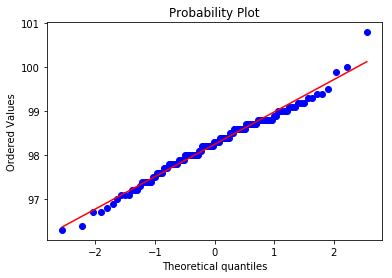

In [6]:
## 1. Is the distribution of body temperatures normal?
## (Q-Q plot)
import statsmodels.api as sm
import pylab

temperature = df['temperature']   
stats.probplot(temperature, dist="norm", plot=pylab)
pylab.show()



(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

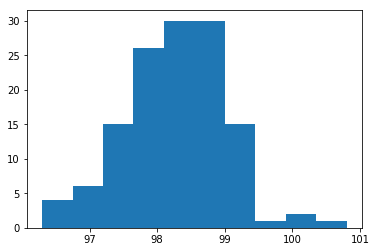

In [34]:
#historgram of temperature parameter
plt.hist(df['temperature'])

The Q-Q plot show the distribution of temperature is closed to normal distribution. Yet if we look from histogram plot, we can see some outliers actually exist in the temperature parameters.

#2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [7]:
## 2a.Is the sample size large? 
print (df.shape)

(130, 3)


Based on CLT, it dictated that if the sample size is large enough(>30). then the sample should represent a normal distribution. Therefore, The sample size is large enough. 

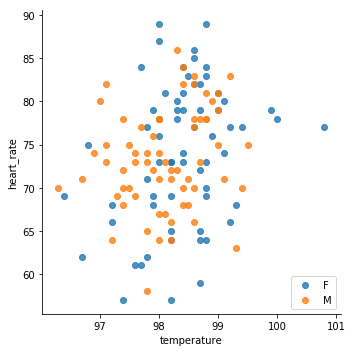

In [14]:
## 2b. Are the observations independent?
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot( x="temperature", y="heart_rate", data=df, fit_reg=False, hue='gender', legend=False)
plt.legend(loc='lower right')
plt.show()

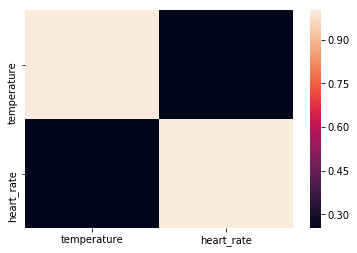

In [16]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

The scatter plot and the correlation coefficient heatmap between temperature and heart rate seems random distributed, therefore they should be independent to each other.

#3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t or  z statistic?
Now try using the other test. How is the result be different? Why?

In [21]:
def diff_from_true(data, true_value = 98.6):
    return np.mean(data) - true_value

def bootstrap_replicate_1d(data,func):
    return func(np.random.choice(data, size = len(data)))

def draw_bs_reps(data, func, size = 1):
    
    #initializearray
    bs_replicate = np.empty(size)
    
    #generate replicates
    for i in range(size):
        bs_replicate[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicate

true_value = 98.6
exp_shift = df['temperature'] - np.mean(df['temperature']) + 98.6
diff_obs = diff_from_true(df['temperature'])
bs_replicate = draw_bs_reps(df['temperature'], diff_from_true, 10000)
p_value = np.sum(bs_replicate <= diff_obs)/10000

print (p_value)

0.498


The p_value is larger than 0.05, therefore there's no significant difference between empirical sample mean and the true population mean.  

We would use one sample t-test since we are comparing sample mean from the population mean.

Although the sample size is larger than 30, yet the population standard deviation is uncertain, therefore I would use t-test instead.  

In [29]:
# one sample t-test
from scipy import stats

t_statistic, p_value = stats.ttest_1samp(df['temperature'], popmean = 98.6)

print ("one-sample t-test", p_value)

one-sample t-test 2.4106320415561276e-07


In [33]:
# one sample wilcoxon-test
z_statistic, p_value = stats.wilcoxon(df['temperature'] - 98.6)
print ("one-sample wilcoxon-test", p_value)

one-sample wilcoxon-test 1.166100005354314e-06


The result from wilcoxon-test and t-test seems very similar, yet their samll difference can be explained by the fact that the distribution is not perfectly symmetric. 

#4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t and  z statistic?

In [37]:
# draw 10 samples from the dataframe
df_10 = df.sample(10)

## one sample t-test
t_stat_10, p_value_10 = stats.ttest_1samp(df_10['temperature'], popmean = 98.6)
print ("one-sample t-test", p_value)

# one sample wilcoxon-test
z_stat_10, p_value_10_z = stats.wilcoxon(df_10['temperature'] - 98.6)
print ("one-sample wilcoxon-test", p_value_10_z)

one-sample t-test 1.166100005354314e-06
one-sample wilcoxon-test 0.01234415027372231


In the case, we only know population mean, we don't know about the population standard deviation. Here, the sample size is smaller than 30, therefore t-test should be more suitable. 

There seems a significant difference between z-test and t-test. It could be explained by the fact that z-score is sensitive to the sample size and the smaller the sample size, the more sensitive it is to the central tendency. Whereas t-test can be used to acocunt for the sample variance when the sample is small and the data is normally distrubted. 

--------------------------------------------------------------------------

#5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

95% confidence interval = [98.12998077 98.36846154] temperatures


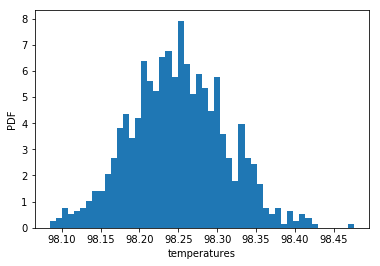

In [41]:
## bootstrap
"""
def draw_bs_pairs_linreg(x, y, size=1):
    ##Perform pairs bootstrap for linear regression.

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps
"""

bs_replicates = draw_bs_reps(df['temperature'], np.mean, size=1000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'temperatures')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('temperatures')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [45]:
# z-test
sample_sd = np.std(df['temperature'])
se = sample_sd/np.sqrt(df.shape[0])
lower = np.mean(df['temperature'])- 1.96*se 
upper = np.mean(df['temperature'] + 1.96*se)

print ("The 95% confident interval for t-test would be ", lower, "and ", upper)


The 95% confident interval for t-test would be  98.12367980442819 and  98.37478173403328


If the temperature below 98.13 or if the temperature is above 98.37, the the temperature would be considered "abnormal".

#6 Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [55]:
# males df
df_male = df.loc[df['gender']=='M']

# female df
df_female = df.loc[df['gender']=='F']

# male temperature
t_m = df_male['temperature']

# female temperature
t_f = df_female['temperature']

# Compute the difference in mean temperature: diff_means
diff_means = np.mean(t_m) - np.mean(t_f)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((t_m, t_f)))

# Generate shifted data sets
male_shifted = t_m - np.mean(t_m) + mean_count
female_shifted = t_f - np.mean(t_f) + mean_count

# Generate bootstrap replicates
bs_reps_male = draw_bs_reps(male_shifted,
                               np.mean, size=10000)
bs_reps_female = draw_bs_reps(female_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_male - bs_reps_female

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(t_m) - np.mean(t_f)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.9893


The result showed that there's no significant difference between males and females normal temperature. I would use bootstrap because it is uncertain for both male and female's data distribution, is would be more robust to to use bootstrap simulate a hypothesis.